In [2]:
# imorting requires Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Reading the Data
df=pd.read_csv('C:/Users/Kalyan/Desktop/Prodigy_Internship/Task_1/Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Preprocessing

#### Null Values

In [5]:
df.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

<Axes: >

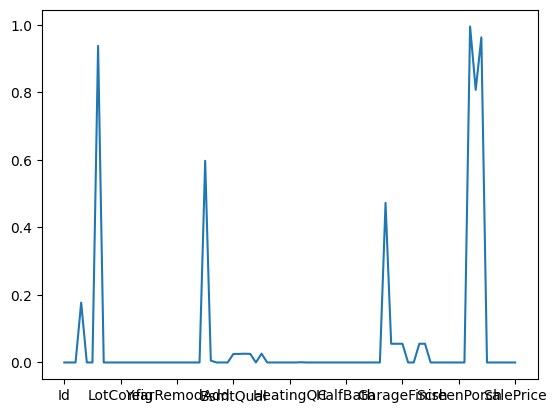

In [6]:
# removing those columns whose null values percentage is more
df.isna().mean().plot()

In [7]:
no_use_columns=list(df.columns[df.isna().mean()>0.4])
df.drop(no_use_columns,axis=1,inplace=True)

In [8]:
# Imputing Null values is a major thing,using median as a central measure to impute at null
for i in df.columns:
    if df[i].dtype in ['int64','float64']:
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].mode())

In [9]:
more_specified_cols=df.columns[df.isna().sum()>0]

In [10]:
print(df[more_specified_cols[0]].value_counts())
set(df[more_specified_cols[0]]) 
#print(df[more_specified_cols[0]].shape)


BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


{'Ex', 'Fa', 'Gd', 'TA', nan}

In [11]:
for i in set(df[more_specified_cols[0]]):
    print(i,type(i))

nan <class 'float'>
Fa <class 'str'>
TA <class 'str'>
Gd <class 'str'>
Ex <class 'str'>


In [12]:
for i in more_specified_cols:
    df[i]=df[i].replace({float('nan') : df[i].mode().values[0]})

<Axes: >

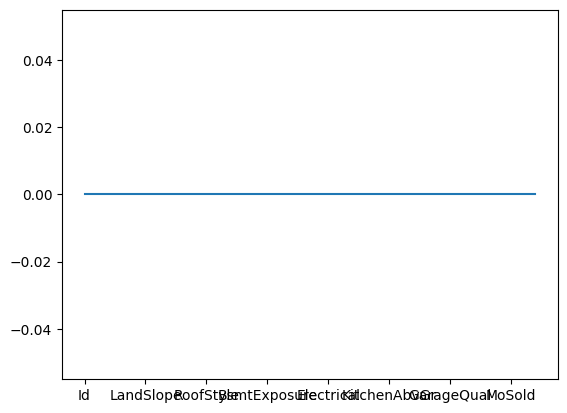

In [13]:
df.isna().sum().plot()

In [14]:
# removing Irrelative columns i.e Id
df.drop('Id',axis=1,inplace=True)

In [15]:
# Seperating numericals and categorical columns
num_cols=df.select_dtypes(['int64','float64']).columns
cat_cols=df.select_dtypes('object').columns

In [16]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
## deriving special columns from the features i.e. timeseries like data related
special_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [19]:
df[cat_cols[13]].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

##### Here there are some less occurring events,when splitting the main data to train and test pieces we may get error while transforming,so there is need to impute more occurring attributes at less occuring events

In [20]:
# got the insight and treatment for less occurring attribute in the feature
for i in range(len(cat_cols)):
    to_remove_attr=list(df[cat_cols[i]].value_counts()[df[cat_cols[i]].value_counts()<10].index)
    adding_attr=df[cat_cols[i]].value_counts()[df[cat_cols[i]].value_counts()==df[cat_cols[i]].value_counts().max()].index[0]
    for r in to_remove_attr: 
        df[cat_cols[i]]=df[cat_cols[i]].replace({r:adding_attr})

In [21]:
df[cat_cols[13]].value_counts()

RoofMatl
CompShg    1449
Tar&Grv      11
Name: count, dtype: int64

##### Splitting data into Train and Test Pieces

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df.SalePrice,test_size=0.2,random_state=42)

In [23]:
#### Categorical Encoding
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
x_train[cat_cols]=encoder.fit_transform(x_train[cat_cols])
x_test[cat_cols]=encoder.transform(x_test[cat_cols])

In [24]:
x_train.select_dtypes('object').columns

Index([], dtype='object')

In [25]:
mask = np.zeros_like(x_train[num_cols[:-1:]].corr())
mask[np.triu_indices_from(mask)] = True

<Axes: >

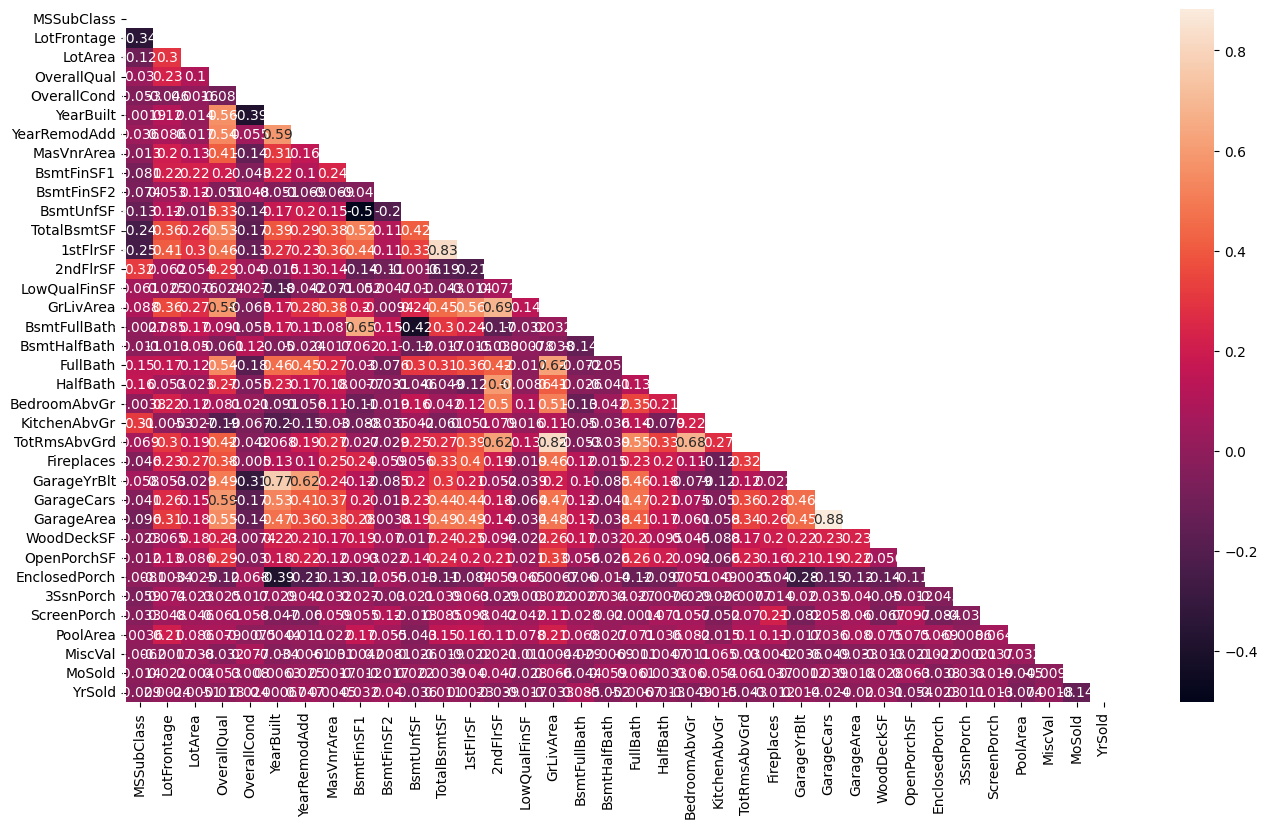

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(x_train[num_cols[:-1:]].corr(),annot=True,mask=mask)

##### Here in the above graph,it is representing alot of multicollinearity b/w columns and have to remove those multicollinear columns,by following stepwise regression which involves in using statistic probabilities to decide whether a feature is informative or contributes to the accuracy of the model.

In [27]:
import statsmodels.api as sm
def stepwise_regression(X,y):
    threshold_in=0.01
    threshold_out=0.05
    include=[]
    while True:
        change=False
        # forward step
        exclude=list(set(list(X.columns))-set(include))
        new_pvalues=pd.Series(index=exclude)
        for new_col in exclude:
            model=sm.OLS(y,sm.add_constant(X[include+[new_col]])).fit()
            new_pvalues[new_col]=model.pvalues[new_col]
        best_pval=new_pvalues.min()
        if best_pval<threshold_in:
            best_col=new_pvalues.idxmin()
            include.append(best_col)
            print(f'Add {best_col} because Probability of {best_col} is {best_pval}')
            change=True
        # backward step
        model=sm.OLS(y,sm.add_constant(X[include])).fit()
        pvalues=model.pvalues.iloc[1:]
        worst_pval=pvalues.max()
        if worst_pval>threshold_out:
            worst_col=pvalues.idxmax()
            include.remove(worst_col)
            change=True
            print(f'Remove {worst_col} because Probability of{worst_col} is {worst_pval}')
        if not change:
            break
    return include
features=stepwise_regression(x_train,y_train)

Add OverallQual because Probability of OverallQual is 2.5961400770794685e-245
Add GrLivArea because Probability of GrLivArea is 1.8740282302259668e-66
Add BsmtQual because Probability of BsmtQual is 4.3299705557700715e-32
Add BsmtFinSF1 because Probability of BsmtFinSF1 is 9.297984088261201e-24
Add GarageCars because Probability of GarageCars is 2.658199031791003e-19
Add KitchenQual because Probability of KitchenQual is 7.944565439443642e-17
Add MSSubClass because Probability of MSSubClass is 1.0912593022260823e-16
Add BsmtExposure because Probability of BsmtExposure is 3.805162299873634e-08
Add LotArea because Probability of LotArea is 1.4307054839368926e-06
Add YearBuilt because Probability of YearBuilt is 1.3081803206343072e-06
Add OverallCond because Probability of OverallCond is 1.1152588597674155e-08
Add LotFrontage because Probability of LotFrontage is 2.4562096423047176e-05
Add Fireplaces because Probability of Fireplaces is 3.425512082379116e-05
Add ExterQual because Probabili

In [28]:
set(features).intersection(set(cat_cols))

{'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'ExterQual',
 'Functional',
 'KitchenQual',
 'RoofStyle'}

In [29]:
set(features).intersection(set(num_cols))

{'BsmtFinSF1',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MSSubClass',
 'OverallCond',
 'OverallQual',
 'ScreenPorch',
 'YearBuilt'}

In [30]:
# upon using step_wise regression with statsmodels OLS we got significant features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train[features])
x_test_scaled=scaler.transform(x_test[features])

In [31]:
import statsmodels.api as sm
model=sm.OLS(y_train,sm.add_constant(x_train[features])).fit()
predict_train=model.predict(sm.add_constant(x_train[features]))
predict_test=model.predict(sm.add_constant(x_test[features]))

In [32]:
from sklearn.metrics import r2_score
print(f'Training score={r2_score(y_train,predict_train)}')
print(f'Testing score={r2_score(y_test,predict_test)}')

Training score=0.8332224485833777
Testing score=0.8356784701531753


In [37]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(predict_train,y_train)))
print(math.sqrt(mean_squared_error(predict_test,y_test)))

31539.706841364405
35502.10890622107
